In [62]:
# Library Imports
import os, math, random
from collections import Counter

import RNA
import subprocess
from IPython.display import Image, SVG

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from colorama import Fore, Back, Style

In [63]:
# Data Import
path = 'dataset'
train_df = pd.read_json(f'{path}/train.json',lines=True)
test_df = pd.read_json(f'{path}/test.json', lines=True)
sub_df = pd.read_csv(f'{path}/sample_submission.csv')

print('Train set sequences: ', train_df.shape)
print('Test set sequences: ', test_df.shape)

Train set sequences:  (2400, 19)
Test set sequences:  (3634, 7)


## Train Data Overview

In [64]:
train_df.head()

,index,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1,107,68,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[0.26130000000000003, 0.38420000000000004, 0.1...","[0.2631, 0.28600000000000003, 0.0964, 0.1574, ...","[0.1501, 0.275, 0.0947, 0.18660000000000002, 0...","[0.2167, 0.34750000000000003, 0.188, 0.2124, 0...","[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...","[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000..."
1,1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0.193,0,107,68,"[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[10.1986, 9.2418, 5.0933, 5.0933, 5.0933, 5.09...","[16.6174, 13.868, 8.1968, 8.1968, 8.1968, 8.19...","[15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...","[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.17020000000000002, 0.178, 0.111, 0.091, 0.0...","[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499..."
3,3,id_0082d463b,GGAAAAGCGCGCGCGCGCGCGCGAAAAAGCGCGCGCGCGCGCGCGC...,......((((((((((((((((......))))))))))))))))((...,EEEEEESSSSSSSSSSSSSSSSHHHHHHSSSSSSSSSSSSSSSSSS...,0.104,0,107,68,"[3.5229, 6.0748, 3.0374, 3.0374, 3.0374, 3.037...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[11.8007, 12.7566, 5.7733, 5.7733, 5.7733, 5.7...","[121286.7181, 121286.7182, 121286.7181, 121286...","[15.3995, 8.1124, 7.7824, 7.7824, 7.7824, 7.78...","[0.0, 2.2399, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, -0.5083, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[3.4248, 6.8128, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -0.8365, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...","[7.6692, -1.3223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
4,4,id_0087940f4,GGAAAAUAUAUAAUAUAUUAUAUAAAUAUAUUAUAGAAGUAUAAUA...,.....(((((((.((((((((((((.(((((((((....)))))))...,EEEEESSSSSSSBSSSSSSSSSSSSBSSSSSSSSSHHHHSSSSSSS...,0.423,0,107,68,"[1.665, 2.1728, 2.0041, 1.2405, 0.620200000000...","[4.2139, 3.9637000000000002, 3.2467, 2.4716, 1...","[3.0942, 3.015, 2.1212, 2.0552, 0.881500000000...","[2.6717, 2.4818, 1.9919, 2.5484999999999998, 1...","[1.3285, 3.6173, 1.3057, 1.3021, 1.1507, 1.150...","[0.8267, 2.6577, 2.8481, 0.40090000000000003, ...","[2.1058, 3.138, 2.5437000000000003, 1.0932, 0....","[4.7366, 4.6243, 1.2068, 1.1538, 0.0, 0.0, 0.7...","[2.2052, 1.7947000000000002, 0.7457, 3.1233, 0...","[0.0, 5.1198, -0.3551, -0.3518, 0.0, 0.0, 0.0,..."


In [65]:
# Data Info Method
def data_info(_id, df):
    print(Fore.YELLOW)
    print("ID = ",_id)
    sample_data = df.loc[df['id'] == _id]
    print(Fore.MAGENTA)
    print("Secquence : \n\n",sample_data['sequence'].values[0])
    print(dict(Counter(sample_data['sequence'].values[0])))
    print("Secquence Length : ",len(sample_data['sequence'].values[0]))
    print(Fore.CYAN)
    print("Structure : \n",sample_data['structure'].values[0])
    print(dict(Counter(sample_data['structure'].values[0])))
    print("Structure Length : ",len(sample_data['structure'].values[0]))
    print(Fore.WHITE)
    print("predicted_loop_type : \n\n",sample_data['predicted_loop_type'].values[0])
    print(dict(Counter(sample_data['predicted_loop_type'].values[0])))
    print("predicted_loop_type Length : ",len(sample_data['predicted_loop_type'].values[0]))
    print(Fore.GREEN)
    print("seq_length :",sample_data['seq_length'].values)
    print("seq_scored :",sample_data['seq_scored'].values)
    print(Style.RESET_ALL)

In [66]:
data_info("id_001f94081",train_df)


ID =  id_001f94081

Secquence : 

 GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUAACUGGAAUAACCCAUACCAGCAGUUAGAGUUCGCUCUAACAAAAGAAACAACAACAACAAC
{'G': 19, 'A': 45, 'C': 23, 'U': 20}
Secquence Length :  107

Structure : 
 .....((((((.......)))).)).((.....((..((((((....))))))..)).....))....(((((((....))))))).....................
{'.': 61, '(': 23, ')': 23}
Structure Length :  107

predicted_loop_type : 

 EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHHHSSSSSSIISSIIIIISSXXXXSSSSSSSHHHHSSSSSSSEEEEEEEEEEEEEEEEEEEEE
{'E': 26, 'S': 46, 'H': 15, 'B': 1, 'X': 5, 'I': 14}
predicted_loop_type Length :  107

seq_length : [107]
seq_scored : [68]



In [67]:
# signal_to_noise Histogram

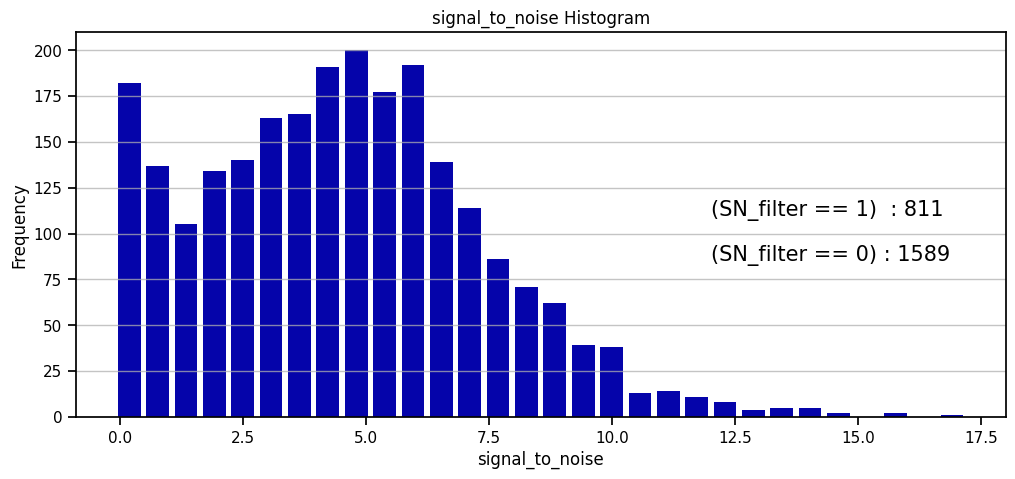

In [68]:
plt.figure(figsize=(12,5))
n, bins, patches = plt.hist(x=train_df['signal_to_noise'], bins='auto', color='#0504aa', alpha=1, rwidth=0.80)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('signal_to_noise')
plt.ylabel('Frequency')
plt.title('signal_to_noise Histogram')
plt.text(12, 110, f"(SN_filter == 1)  : {train_df['SN_filter'].value_counts()[0]}", fontsize=15)
plt.text(12, 85, f"(SN_filter == 0) : {train_df['SN_filter'].value_counts()[1]}", fontsize=15)
plt.show()

In [69]:
train_df.seq_length.value_counts()

seq_length
107    2400
Name: count, dtype: int64

In [70]:
train_df.seq_scored.value_counts()

seq_scored
68    2400
Name: count, dtype: int64

## Test Data Overview

In [71]:
test_df.head()

,index,id,sequence,structure,predicted_loop_type,seq_length,seq_scored
0,0,id_00073f8be,GGAAAAGUACGACUUGAGUACGGAAAACGUACCAACUCGAUUAAAA...,......((((((((((.(((((.....))))))))((((((((......,EEEEEESSSSSSSSSSBSSSSSHHHHHSSSSSSSSSSSSSSSSHHH...,107,68
1,1,id_000ae4237,GGAAACGGGUUCCGCGGAUUGCUGCUAAUAAGAGUAAUCUCUAAAU...,.....((((..((((((...(((((.....((((....)))).......,EEEEESSSSIISSSSSSIIISSSSSIIIIISSSSHHHHSSSSIIII...,130,91
2,2,id_00131c573,GGAAAACAAAACGGCCUGGAAGACGAAGGAAUUCGGCGCGAAGGCC...,...........((.(((.(.(..((..((..((((...))))..))...,EEEEEEEEEEESSISSSISISIISSIISSIISSSSHHHSSSSIISS...,107,68
3,3,id_00181fd34,GGAAAGGAUCUCUAUCGAAGGAUAGAGAUCGCUCGCGACGGCACGA...,......((((((((((....))))))))))((((((..((.(((.....,EEEEEESSSSSSSSSSHHHHSSSSSSSSSSSSSSSSIISSISSSHH...,107,68
4,4,id_0020473f7,GGAAACCCGCCCGCGCCCGCCCGCGCUGCUGCCGUGCCUCCUCUCC...,.....(((((((((((((((((((((((((((((((((((((((((...,EEEEESSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS...,130,91


In [72]:
data_info("id_000ae4237",test_df)


ID =  id_000ae4237

Secquence : 

 GGAAACGGGUUCCGCGGAUUGCUGCUAAUAAGAGUAAUCUCUAAAUGCAGCUACCGGCUCUAUAAUGAGCAAAAACGGUAAAUCCCGACAAGCUUGAUUUCGAUCAAGCAAAAGAAACAACAACAACAAC
{'G': 26, 'A': 50, 'C': 29, 'U': 25}
Secquence Length :  130

Structure : 
 .....((((..((((((...(((((.....((((....))))....)))))..)))((((......)))).....))).....))))....(((((((....))))))).....................
{'.': 70, '(': 30, ')': 30}
Structure Length :  130

predicted_loop_type : 

 EEEEESSSSIISSSSSSIIISSSSSIIIIISSSSHHHHSSSSIIIISSSSSIISSSSSSSHHHHHHSSSSMMMMMSSSIIIIISSSSXXXXSSSSSSSHHHHSSSSSSSEEEEEEEEEEEEEEEEEEEEE
{'E': 26, 'S': 60, 'I': 21, 'H': 14, 'M': 5, 'X': 4}
predicted_loop_type Length :  130

seq_length : [130]
seq_scored : [91]



In [73]:
test_df.seq_length.value_counts()

seq_length
130    3005
107     629
Name: count, dtype: int64

In [74]:
test_df.seq_scored.value_counts()

seq_scored
91    3005
68     629
Name: count, dtype: int64

## Detailed Analysis

In [75]:
def character_count(row):
    _dictionary = {'G': 0,'A': 0, 'C': 0, 'U': 0, '.': 0, '(': 0, ')': 0, 'E': 0, 'S': 0, 'H': 0, 'B': 0, 'X': 0,'I': 0,'M':0}
    _dictionary = {**_dictionary, **dict(Counter(row['sequence']))}
    _dictionary = {**_dictionary, **dict(Counter(row['structure']))}
    _dictionary = {**_dictionary, **dict(Counter(row['predicted_loop_type']))}
    return list(_dictionary.values())

In [76]:
## Train-Data
feature_columns = ['G','A', 'C', 'U', '.', '(', ')', 'E', 'S', 'H', 'B', 'X','I','M']
train_df[feature_columns] = train_df.apply(character_count,axis=1,result_type="expand")

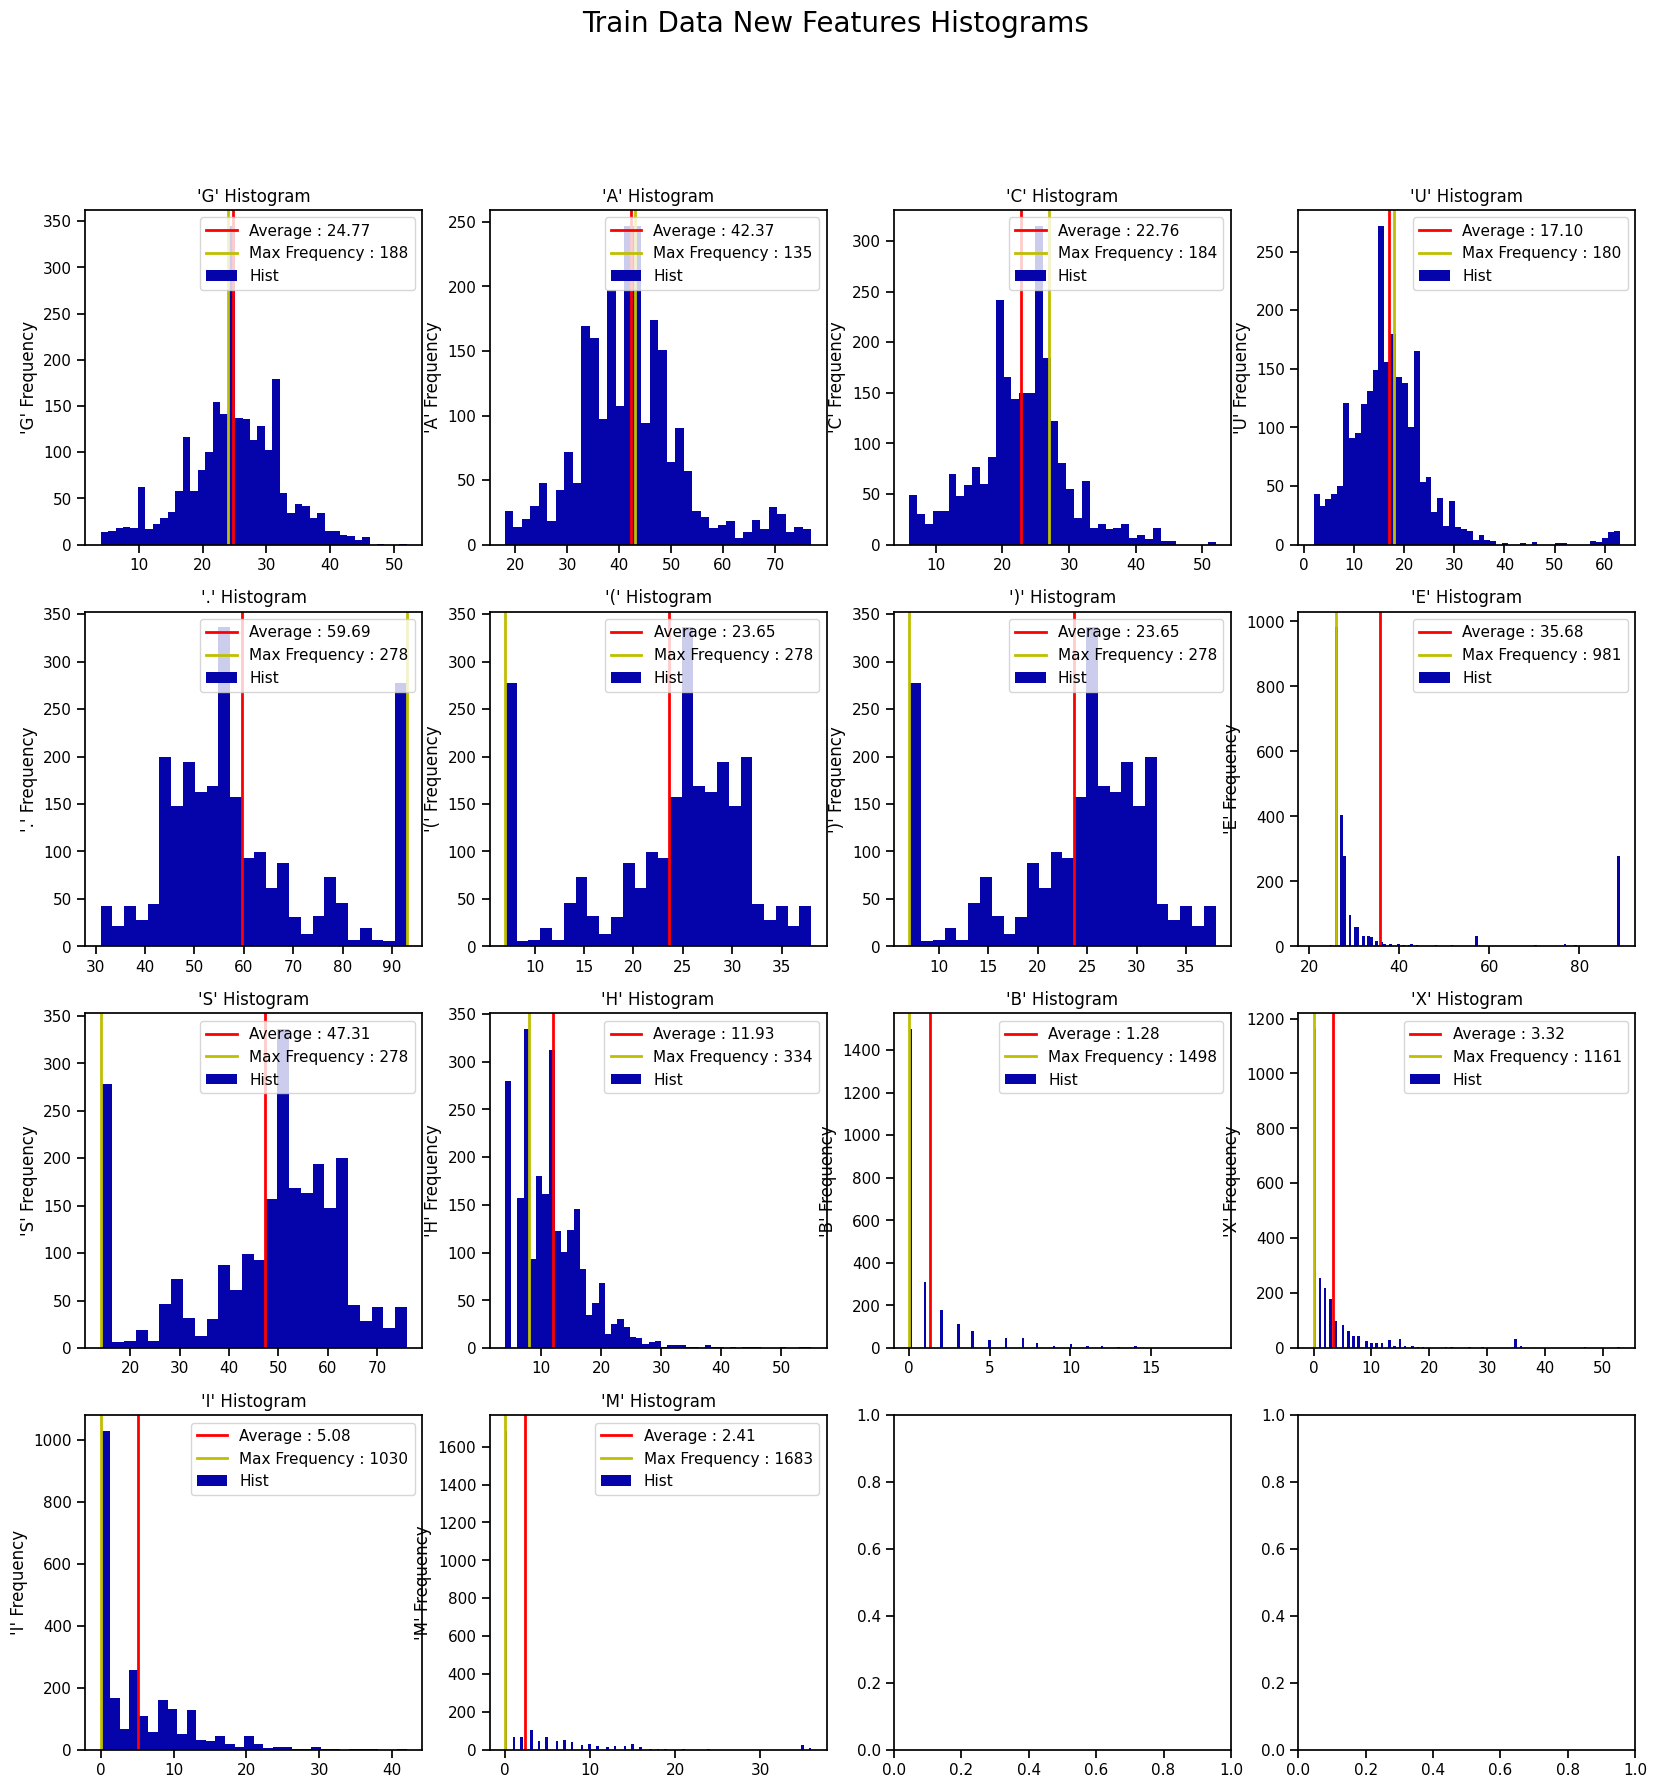

In [77]:
fig, _ax = plt.subplots(nrows=4,ncols=4,figsize=(20,20))
fig.suptitle("Train Data New Features Histograms", fontsize=20,)
for i,_ax in enumerate(_ax.ravel()[:14]):
    mean_value = train_df[feature_columns[i]].mean()
    max_value_index,max_value = Counter(train_df[feature_columns[i]]).most_common(1)[0]
    
    _ax.hist(x=train_df[feature_columns[i]],bins='auto', color='#0504aa', alpha=1, rwidth=1)
    _ax.set(ylabel=f"'{feature_columns[i]}' Frequency", title= f"'{feature_columns[i]}' Histogram")
    _ax.axvline(x=mean_value, color='r', label= 'Average',linewidth=2)
    _ax.axvline(x=max_value_index, color='y', label= 'Max',linewidth=2)
    _ax.legend([f"Average : {mean_value:0.2f}",f"Max Frequency : {max_value}", "Hist"], loc ="upper right")
plt.show()

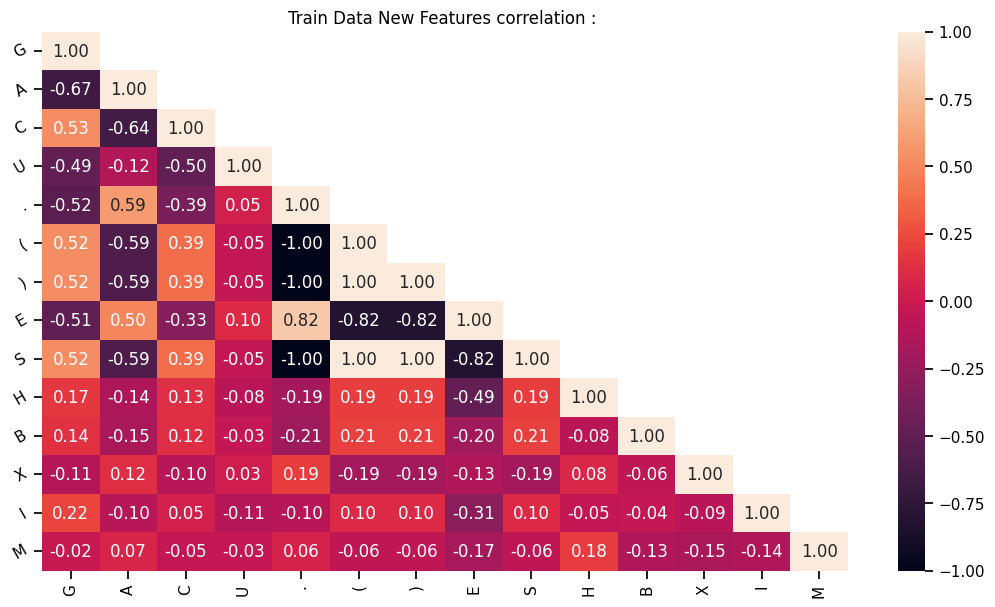

In [78]:
# Train Data New Features correlation
corr = train_df[feature_columns].corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
plt.title("Train Data New Features correlation : ")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [79]:
## Test-Data
feature_columns = ['G','A', 'C', 'U', '.', '(', ')', 'E', 'S', 'H', 'B', 'X','I','M']
test_df[feature_columns] = test_df.apply(character_count,axis=1,result_type="expand")

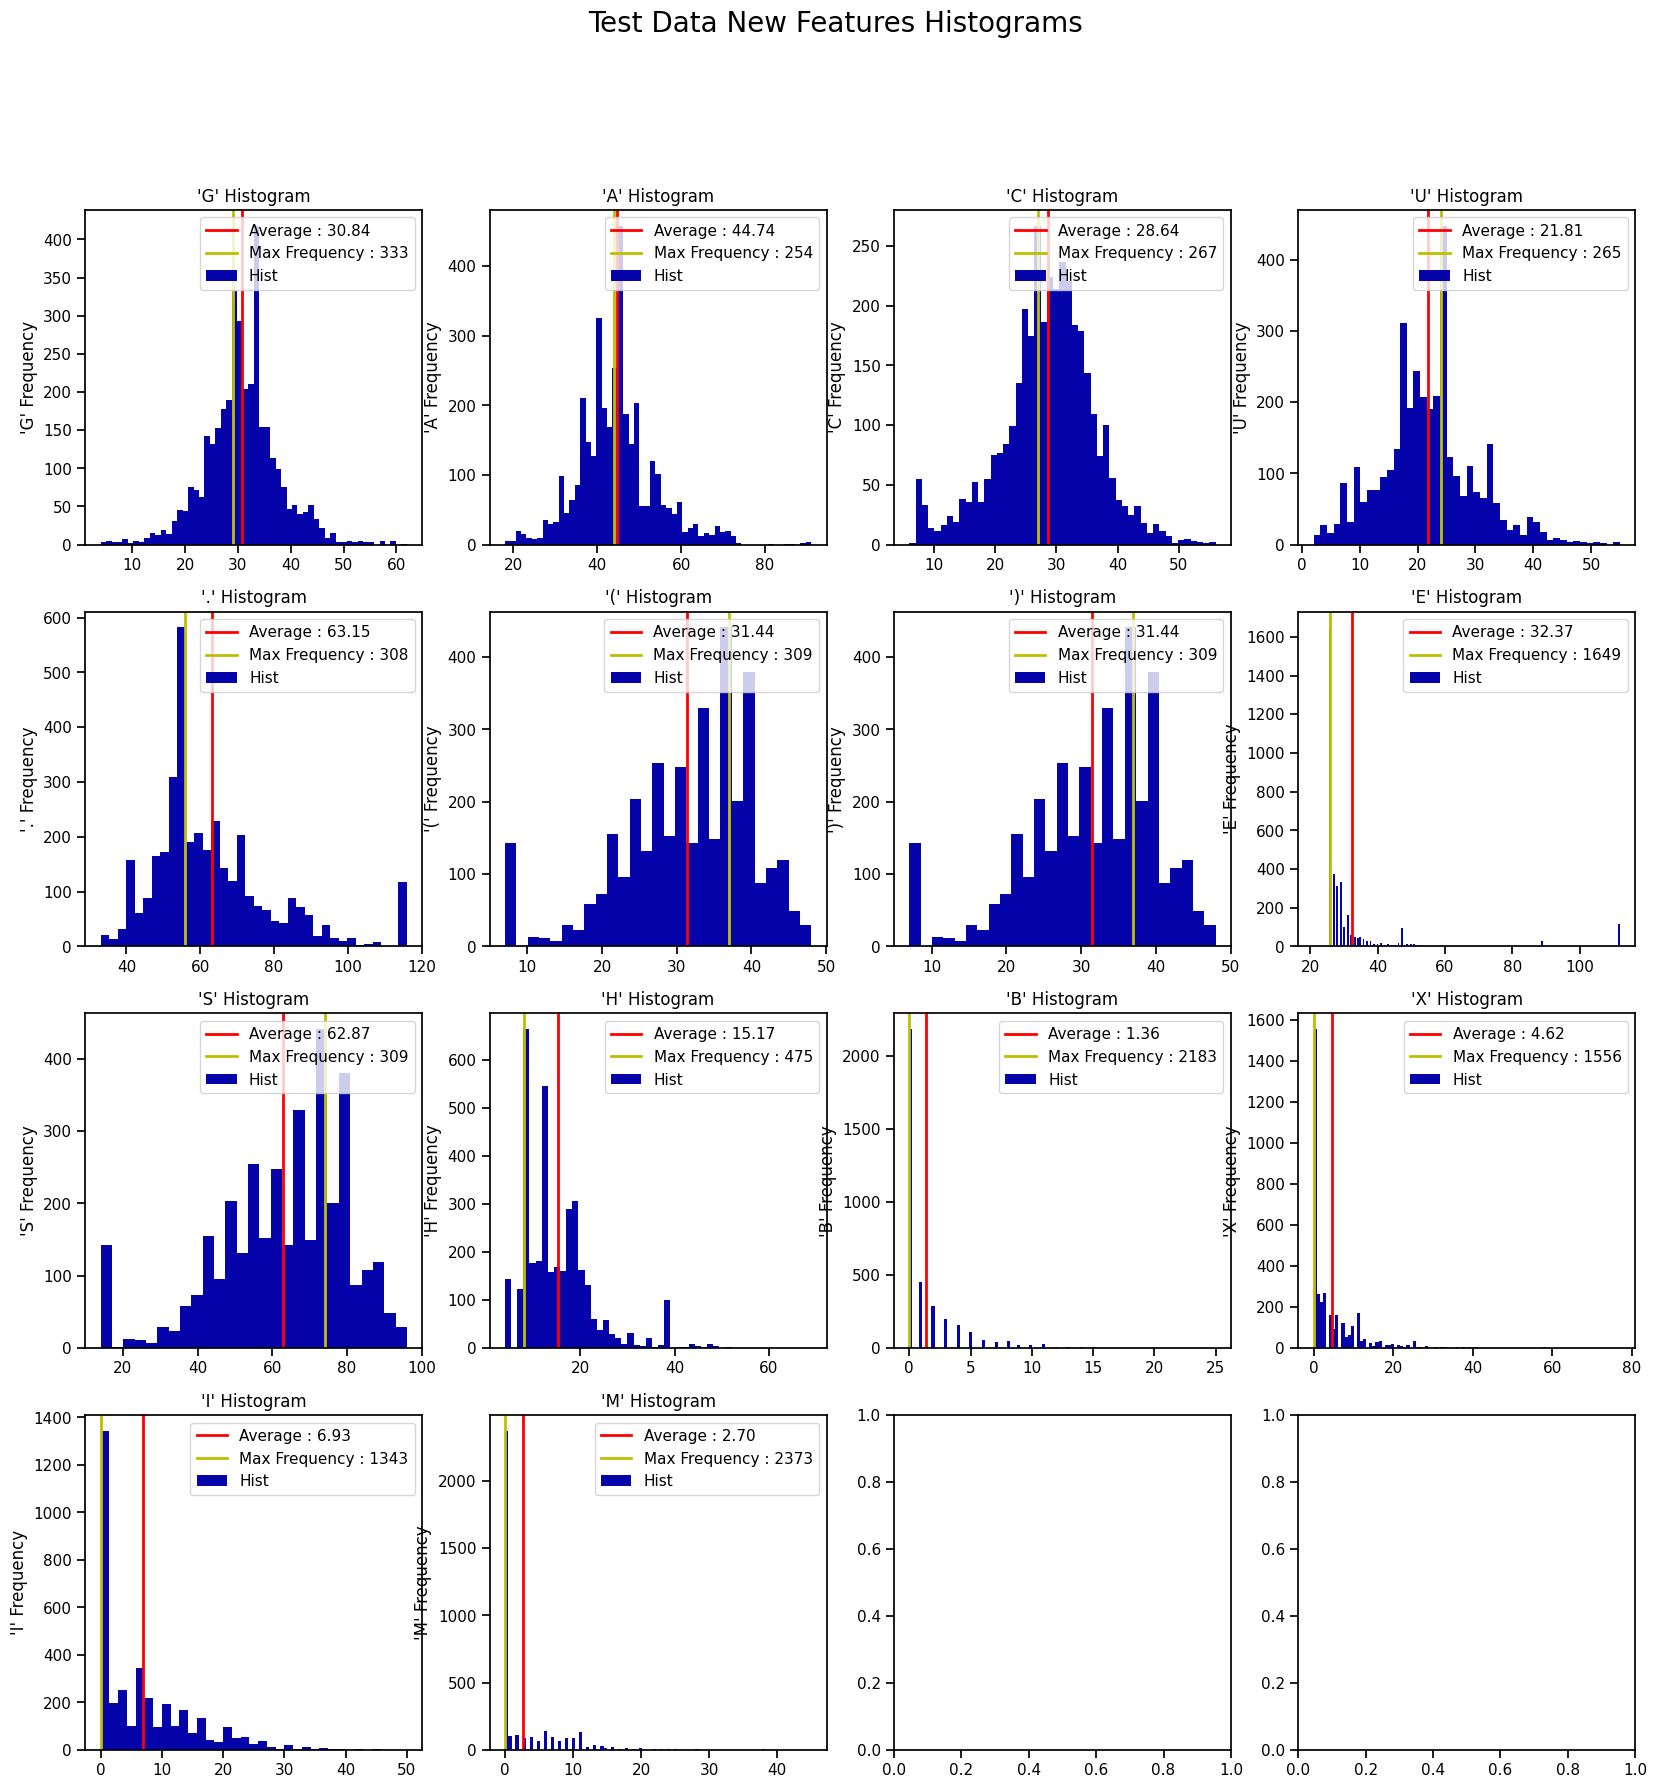

In [80]:
fig, _ax = plt.subplots(nrows=4,ncols=4,figsize=(20,20))
fig.suptitle("Test Data New Features Histograms", fontsize=20,)
for i,_ax in enumerate(_ax.ravel()[:14]):
    mean_value = test_df[feature_columns[i]].mean()
    max_value_index,max_value = Counter(test_df[feature_columns[i]]).most_common(1)[0]
    
    _ax.hist(x=test_df[feature_columns[i]],bins='auto', color='#0504aa', alpha=1, rwidth=1)
    _ax.set(ylabel=f"'{feature_columns[i]}' Frequency", title= f"'{feature_columns[i]}' Histogram")
    _ax.axvline(x=mean_value, color='r', label= 'Average',linewidth=2)
    _ax.axvline(x=max_value_index, color='y', label= 'Max',linewidth=2)
    _ax.legend([f"Average : {mean_value:0.2f}",f"Max Frequency : {max_value}", "Hist"], loc ="upper right")
plt.show()

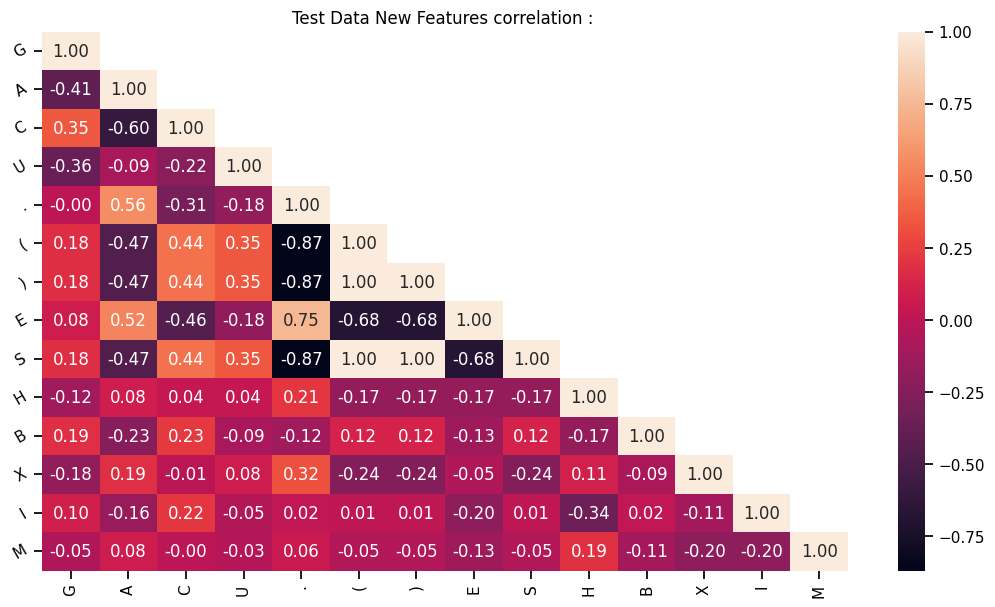

In [81]:
# Test Data New Features correlation
corr = test_df[feature_columns].corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
plt.title("Test Data New Features correlation : ")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

---

## RNA Detailed Analysis 🧬

### Example-1 (from Train data)

In [82]:
Select_id = "id_001f94081"

In [83]:
Sequence = train_df[train_df['id'] == Select_id]["sequence"].values[0]
structure = train_df[train_df['id'] == Select_id]["structure"].values[0]
predicted_loop_type = train_df[train_df['id'] == Select_id]["predicted_loop_type"].values[0]
print("Sequence :",Sequence)
print("structure :",structure)
print("predicted_loop_type :",predicted_loop_type)

Sequence : GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUAACUGGAAUAACCCAUACCAGCAGUUAGAGUUCGCUCUAACAAAAGAAACAACAACAACAAC
structure : .....((((((.......)))).)).((.....((..((((((....))))))..)).....))....(((((((....))))))).....................
predicted_loop_type : EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHHHSSSSSSIISSIIIIISSXXXXSSSSSSSHHHHSSSSSSSEEEEEEEEEEEEEEEEEEEEE


### Method for Graph Representation of RNA structure

In [84]:
def render_neato(s, format='png', dpi=100):
    p = subprocess.Popen(['neato', '-T', format, '-o', '/dev/stdout', '-Gdpi={}'.format(dpi)], 
                         stdout=subprocess.PIPE, stdin=subprocess.PIPE)
    image, _ = p.communicate(bytes(s, encoding='utf-8'))
    return image

In [85]:
#Image(render_neato(bg.to_neato_string(), dpi=60), format='png')

`fiveprime`: The unpaired nucleotides at the 5’ end of a molecule/ chain. Name always starts with ‘f’ (e.g. ‘f0’).

`threeprime`: The unpaired nucleotides at the 3’ end of a molecule/ chain. Name always start with ‘t’ (e.g. ‘t0’)

`stem`: Regions of contiguous canonical Watson-Crick base-paired nucleotides. By default, stems have at least 2 consecutive basepairs. Always start with ‘s’ (e.g., ‘s0’, ‘s1’, ‘s2’, …)

`interior loop`: Bulged out nucleotides and interior loops. An interior loop can contain unpaired bases on either strand or on both strands, flanked by stems on either side. Always start with ‘i’ (‘i0’, ‘i1’, ‘i2’,…)

`multiloop segment`: Single-stranded regions bewteen two stems. Always start with ‘m’. (‘m0’, ‘m1’, ‘m2’…) In the current version of forgi, pseudo-knots and exterior loops segments between stems are treated as multiloop segments.

`hairpin loop`: Always starts with ‘h’.

## Generating Graph Matrices from the Structures

In [86]:
def get_couples(structure):
    """
    For each closing parenthesis, I find the matching opening one and store their index in the couples list.
    The assigned list is used to keep track of the assigned opening parenthesis
    """
    opened = [idx for idx, i in enumerate(structure) if i == '(']
    closed = [idx for idx, i in enumerate(structure) if i == ')']

    assert len(opened) == len(closed)


    assigned = []
    couples = []

    for close_idx in closed:
        for open_idx in opened:
            if open_idx < close_idx:
                if open_idx not in assigned:
                    candidate = open_idx
            else:
                break
        assigned.append(candidate)
        couples.append([candidate, close_idx])
        
    assert len(couples) == len(opened)
    
    return couples

In [87]:
def build_matrix(couples, size):
    mat = np.zeros((size, size))
    
    for i in range(size):  # neigbouring bases are linked as well
        if i < size - 1:
            mat[i, i + 1] = 1
        if i > 0:
            mat[i, i - 1] = 1
    
    for i, j in couples:
        mat[i, j] = 1
        mat[j, i] = 1
        
    return mat

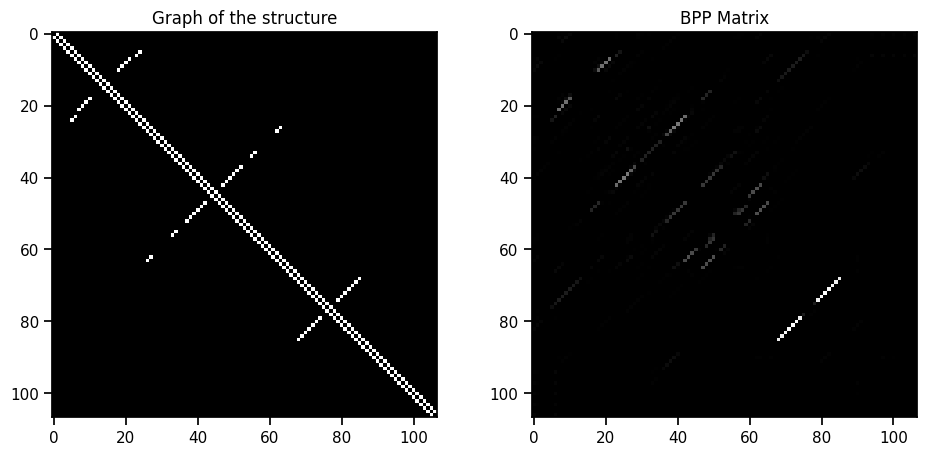

In [88]:
couples = get_couples(structure)
mat = build_matrix(couples, len(structure))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11.35, 5))

im = axes[0].imshow(mat, interpolation='none',cmap='gray')
axes[0].set_title('Graph of the structure')
# axes[0].pcolormesh(adj_mat, )

bpp = np.load(path +f"/bpps/{Select_id}.npy")

im = axes[1].imshow(bpp, interpolation='none',cmap='gray')
axes[1].set_title('BPP Matrix')

plt.show()

### Example-2 (Test Data)

In [89]:
Select_id = "id_000ae4237"

In [90]:
Sequence = test_df[test_df['id'] == Select_id]["sequence"].values[0]
structure = test_df[test_df['id'] == Select_id]["structure"].values[0]
predicted_loop_type = test_df[test_df['id'] == Select_id]["predicted_loop_type"].values[0]
print("Sequence :",Sequence)
print("structure :",structure)
print("predicted_loop_type :",predicted_loop_type)

Sequence : GGAAACGGGUUCCGCGGAUUGCUGCUAAUAAGAGUAAUCUCUAAAUGCAGCUACCGGCUCUAUAAUGAGCAAAAACGGUAAAUCCCGACAAGCUUGAUUUCGAUCAAGCAAAAGAAACAACAACAACAAC
structure : .....((((..((((((...(((((.....((((....))))....)))))..)))((((......)))).....))).....))))....(((((((....))))))).....................
predicted_loop_type : EEEEESSSSIISSSSSSIIISSSSSIIIIISSSSHHHHSSSSIIIISSSSSIISSSSSSSHHHHHHSSSSMMMMMSSSIIIIISSSSXXXXSSSSSSSHHHHSSSSSSSEEEEEEEEEEEEEEEEEEEEE


## Graph Representation of RNA structure

In [91]:
def render_neato(s, format='png', dpi=100):
    p = subprocess.Popen(['neato', '-T', format, '-o', '/dev/stdout', '-Gdpi={}'.format(dpi)], 
                         stdout=subprocess.PIPE, stdin=subprocess.PIPE)
    image, _ = p.communicate(bytes(s, encoding='utf-8'))
    return image

In [92]:
#Image(render_neato(bg.to_neato_string(), dpi=60), format='png')

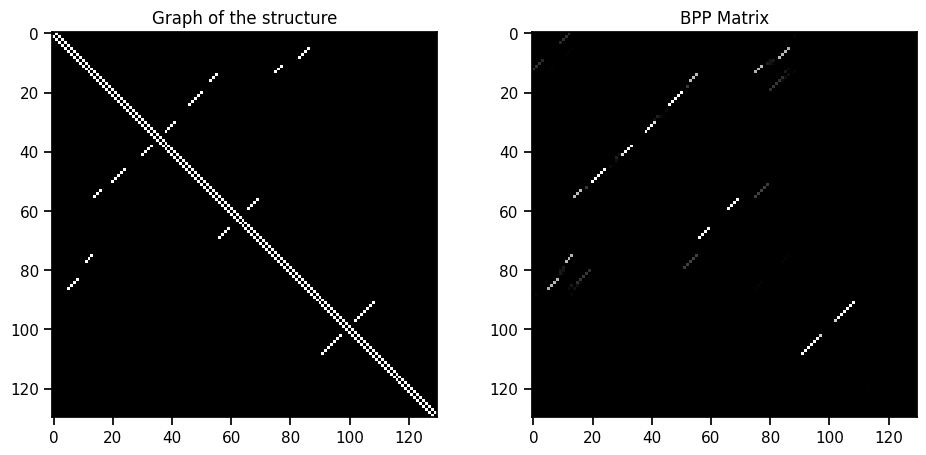

In [93]:
couples = get_couples(structure)
mat = build_matrix(couples, len(structure))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11.35, 5))

im = axes[0].imshow(mat, interpolation='none',cmap='gray')
axes[0].set_title('Graph of the structure')

bpp = np.load(path +f"/bpps/{Select_id}.npy")

im = axes[1].imshow(bpp, interpolation='none',cmap='gray')
axes[1].set_title('BPP Matrix')

plt.show()

NOTE:

The bpps are numpy arrays we pre-calculated for each sequence. 

They're matrices of base pair probabilities, calculated using a recently developed algorithm in our lab.


What you use them for is totally up to you. Biophysically speaking, this matrix gives the probability 

that each pair of nucleotides in the RNA forms a base pair (given a particular model of RNA folding). 


You've probably already seen the structural features: imagine that this matrix describes the whole distribution from which one could sample more structures.

At the simplest level -- it's a symmetric square matrix with the same length as the sequence, so you can get N more features out of it, if you want them.

 Each column and each row should sum to one (up to rounding error), but more than one entry in each column/row will be nonzero -- usually somewhere between 1-5 entries.